<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/Macros/DeadTimeEstimatorMDC2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init and cuts definition

In [1]:
!pip install hist
!pip install mplhep
import hist

In [10]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import uproot

#h5fileCE='drive/MyDrive/root_files_cry5/trk.mu2e.CeEndpointMix1BBSignal.MDC2020r_perfect_v1_0.h5'
#h5fileCE='drive/MyDrive/root_files_cry5/trk.mu2e.CeEndpointMix2BBSignal.MDC2020r_perfect_v1_0.h5'
#h5fileCRY5='drive/MyDrive/root_files_cry5/trk.mu2e.CosmicCRYOnSpillSignal.MDC2020r_perfect_v1_0.h5'

files_root={  
    'root://fndca1.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/usr-nts/nts/oksuzian/CosmicCRYloOnSpillSignal/MDC2020r_perfect_v1_0_trkana_v02_01_00/tka/38/4e/nts.oksuzian.CosmicCRYloOnSpillSignal.MDC2020r_perfect_v1_0_trkana_v02_01_00.002701_00000002.tka' : [17000, 0],
    'root://fndca1.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/usr-nts/nts/oksuzian/CosmicCRYhiOnSpillSignal/MDC2020r_perfect_v1_0_trkana_v02_01_00/tka/da/78/nts.oksuzian.CosmicCRYhiOnSpillSignal.MDC2020r_perfect_v1_0_trkana_v02_01_00.001210_00000000.tka' : [17000, 1]
}

files_root_CE={  
    'root://fndca1.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/usr-nts/nts/oksuzian/CeEndpointMix2BBSignal/MDC2020r_perfect_v1_0_trkana_v02_01_00/tka/8b/b2/nts.oksuzian.CeEndpointMix2BBSignal.MDC2020r_perfect_v1_0_trkana_v02_01_00.001210_00000000.tka' : [17000, -1]
}


In [3]:
import mplhep as hep
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [4]:
!pip install -I git+https://github.com/oksuzian/mu2etools.git
from mu2etools import utils, cuts

  Cloning https://github.com/oksuzian/mu2etools.git to /tmp/pip-req-build-xiyrxzvi
  Running command git clone --filter=blob:none --quiet https://github.com/oksuzian/mu2etools.git /tmp/pip-req-build-xiyrxzvi
  Resolved https://github.com/oksuzian/mu2etools.git to commit 1b8a2b88b5ce01e074aa5e1b62ecc36c5bfa5dfe
  Preparing metadata (setup.py) ... done
  Created wheel for mu2etools: filename=mu2etools-0.0.1-py3-none-any.whl size=5980 sha256=32d0ff53249a57e5a379ded88326dcb388fbc62a7d44f32207501e0ba75e030d
  Stored in directory: /tmp/pip-ephem-wheel-cache-00vuem90/wheels/6c/b7/6f/70403eaed7bd451265390fc7caae8216d27a85d3bd1e77b7a8
Successfully built mu2etools


In [5]:
TMIN = -160
TMAX = 140
PMIN_EXT = 90
PMAX_EXT = 140
PMIN_PHY = 103.85
PMAX_PHY = 105.1

#Default MDC-style cut box
cuts = [
    "(de_status > 0)",
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 105)",
    "(deent_maxr > 450)",
    "(deent_maxr < 680)"
]
cut_tbox = " & ".join(cuts)

#PID, TrkQual and cut on events with an usptream leg
cuts = [
    "(dequal_TrkQual > 0.8)",
    "(dequal_TrkPID > 0.95)",
    "(ue_status <= 0)"
]
cut_pid_trkqual_ue = " & ".join(cuts)

# Extended momentum window cut`
cuts = [
    "(deent_mom > %f)" % PMIN_EXT,
    "(deent_mom < %f)" % PMAX_EXT
]
cut_extmom = " & ".join(cuts)

# Physics momentum window cut`
cuts = [
    "(deent_mom > %f)" % PMIN_PHY,
    "(deent_mom < %f)" % PMAX_PHY,
]
cut_phymom = " & ".join(cuts)

# Loose box cuts
cuts = [
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 205)",
    "(deent_maxr > 450)"
]
cut_lbox = " & ".join(cuts)

cut_t0='(de_t0 > 650) & (de_t0 < 1625)'
#!!crv_live_window='((crvinfo_timeWindowStart > 475 & crvinfo_timeWindowStart < 1650) | crvinfo_timeWindowStart<1)'
crv_live_window='((crv_timeWindowStart > 475 & crv_timeWindowStart < 1650) | crv_timeWindowStart<1)'

# Outside of the coincidence time window
#!!crv_time = "(de_t0 < crvinfo_timeWindowStart + %d | de_t0 > crvinfo_timeWindowEnd + %d)" % (TMIN, TMAX)
crv_time = "( crv_dT < %d | crv_dT > %d)" % (TMIN, TMAX)

# Outside of the coincidence angular window
crv_angle = "(crvinfo_angle < %d | crvinfo_angle > %d)" % (-2.5, 2.5)


#crv_time = "(crvinfo_dTe < %d | crvinfo_dTe > %d)" % (TMIN, TMAX)
#crv_time = crv_time+"& ( crvinfo_dTe < %d | crvinfo_dTe > %d)" % (-100, 150)
#crv_time = crv_time+"& (de_t0 < crvinfo_timeWindowStart | de_t0> crvinfo_timeWindowEnd)" 
#Combime cuts
cut_nomom  = cut_tbox +" & "+cut_pid_trkqual_ue
cut_extmom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_extmom
cut_phymom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_phymom
cut_loose  = cut_lbox +" & "+cut_pid_trkqual_ue

cut_extmom_notiming = cut_extmom
#cut_extmom = cut_extmom+" & " + cut_t0+" & " + crv_live_window
#cut_current = cut_extmom+" & ("+crv_time+" | "+crv_angle+")"
cut_current = cut_extmom+" & "+crv_time

In [6]:
def make_df(trkana, tag_high, lyield):

  df = trkana.arrays(filter_name=['evtinfo.*', 'evtinfomc.*', 'de.*', 'deent*', 'demc.*', 'demcgen.*', 'demcpri.*', 'ue.*', 'crvsummary.*', 'crvsummarymc.*', 'dequal*', 'detrkpid*', 'debestcrv./*', 'debestcrvmc./*'],library="pd")
  df.columns = df.columns.str.replace('.', '_')
  df.columns = df.columns.str.replace('__', '_')
  df.columns = df.columns.str.replace('_fCoordinates_f', '')
  df.columns = df.columns.str.replace('debest', '')
  df["deent_mom"] = pow(pow(df["deent_momX"],2) + pow(df["deent_momY"],2) + pow(df["deent_momZ"],2),0.5)
  df["demcpri_mom"] = pow(pow(df["demcpri_momX"],2) + pow(df["demcpri_momY"],2) + pow(df["demcpri_momZ"],2),0.5)

  df['is_high'] = tag_high
  df['lyield'] = int(lyield)
  df["crv_dT"] = df["crv_timeWindowStart"] - df["de_t0"]
  df["crv_dTe"] = df["crv_timeWindowEnd"] - df["de_t0"]
  df = df.fillna(-999999)
  return df

# Load dataframe

In [7]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [11]:
 def combine_df(files):
    
  df = pd.DataFrame()
  for f in files:
      print("Reading file", f, files[f][0], files[f][1])
      trkana = uproot.open(f+":TrkAnaNeg/trkana")
      df_ = make_df(trkana, files[f][1], files[f][0])
      #df_ = df_.filter(regex=var_str)
      df = df.append(df_)
  df = df.loc[:,~df.columns.duplicated()]  # delete duplicate colummns
  return df   

In [12]:
dfCRY5 = combine_df(files_root)
dfCE = combine_df(files_root_CE)

Reading file root://fndca1.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/usr-nts/nts/oksuzian/CosmicCRYloOnSpillSignal/MDC2020r_perfect_v1_0_trkana_v02_01_00/tka/38/4e/nts.oksuzian.CosmicCRYloOnSpillSignal.MDC2020r_perfect_v1_0_trkana_v02_01_00.002701_00000002.tka 17000 0


/tmp/ipykernel_1437/935319165.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')
/tmp/ipykernel_1437/783973111.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_)


Reading file root://fndca1.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/usr-nts/nts/oksuzian/CosmicCRYhiOnSpillSignal/MDC2020r_perfect_v1_0_trkana_v02_01_00/tka/da/78/nts.oksuzian.CosmicCRYhiOnSpillSignal.MDC2020r_perfect_v1_0_trkana_v02_01_00.001210_00000000.tka 17000 1


/tmp/ipykernel_1437/935319165.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')
/tmp/ipykernel_1437/783973111.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_)


Reading file root://fndca1.fnal.gov/pnfs/fnal.gov/usr/mu2e/tape/usr-nts/nts/oksuzian/CeEndpointMix2BBSignal/MDC2020r_perfect_v1_0_trkana_v02_01_00/tka/8b/b2/nts.oksuzian.CeEndpointMix2BBSignal.MDC2020r_perfect_v1_0_trkana_v02_01_00.001210_00000000.tka 17000 -1


/tmp/ipykernel_1437/935319165.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')
/tmp/ipykernel_1437/783973111.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_)


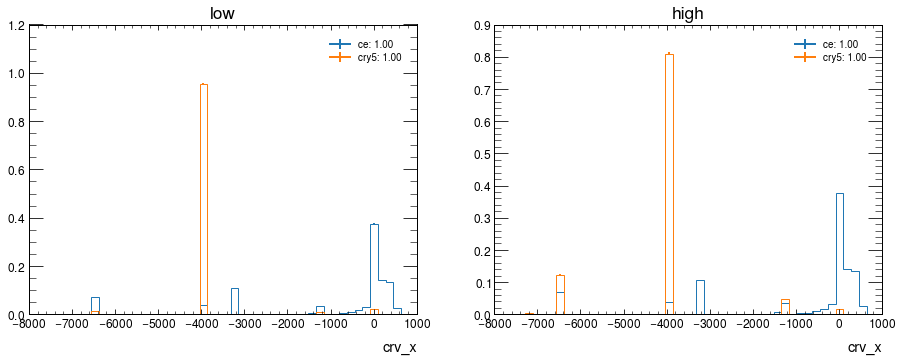

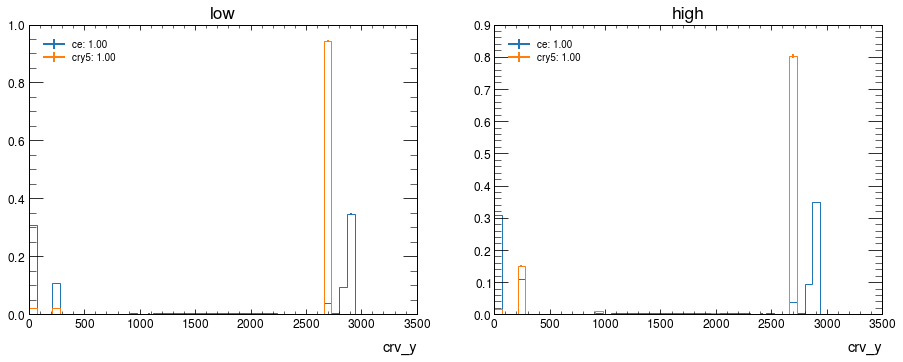

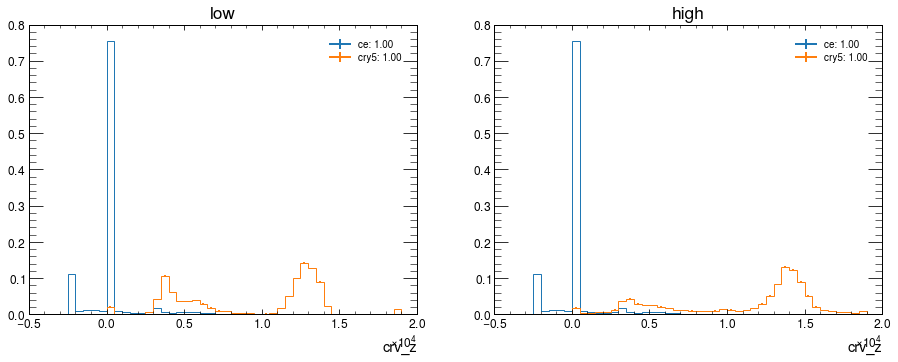

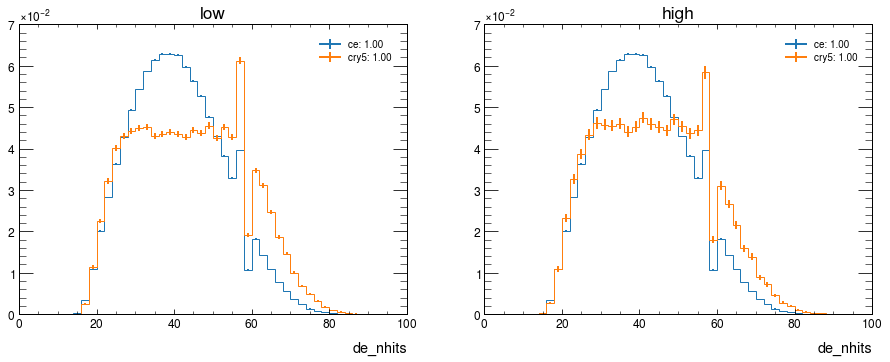

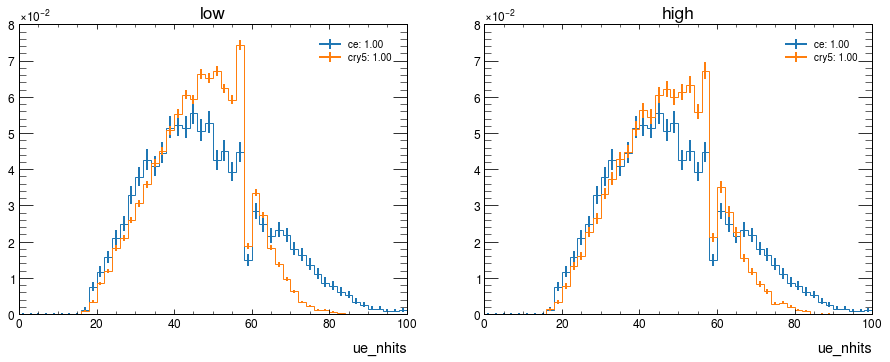

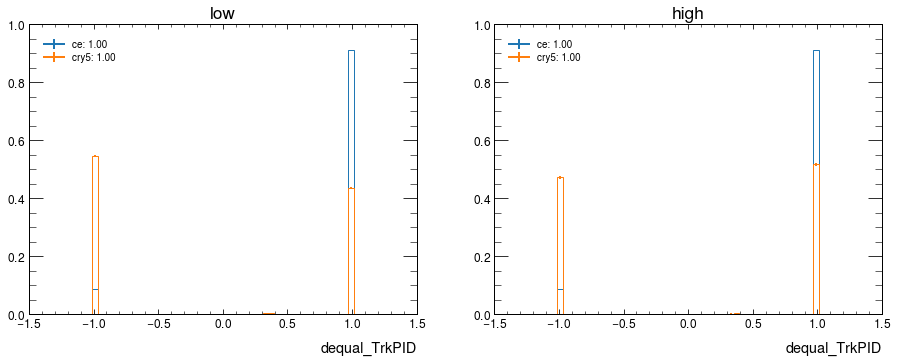

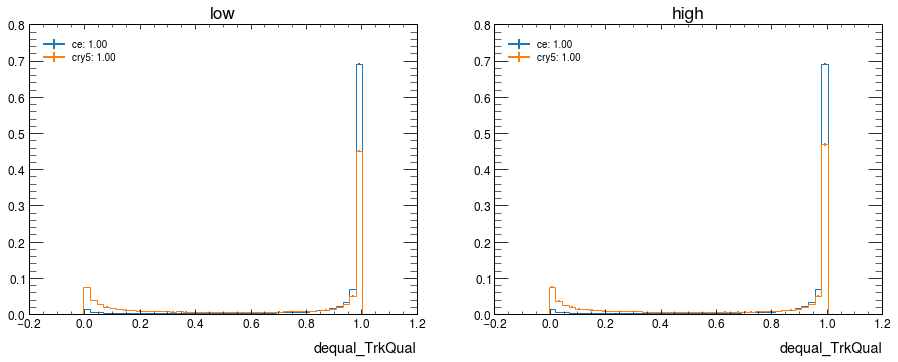

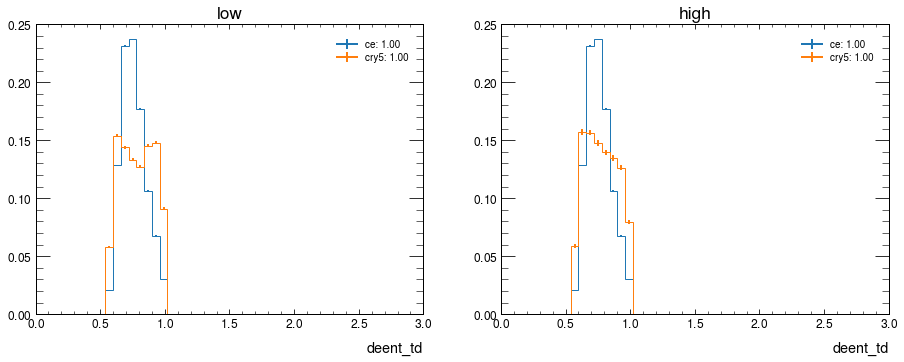

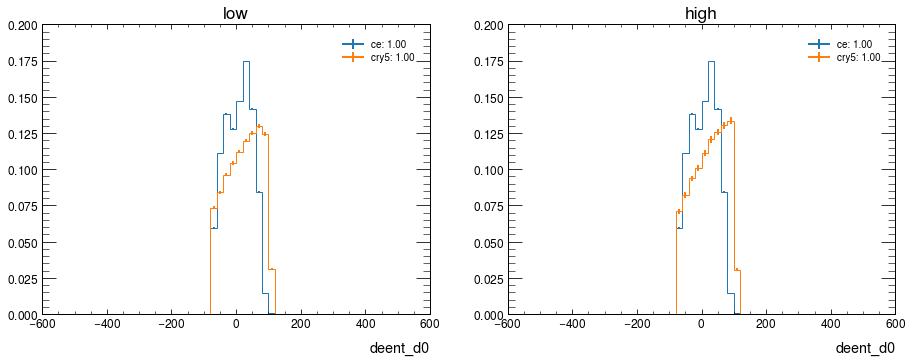

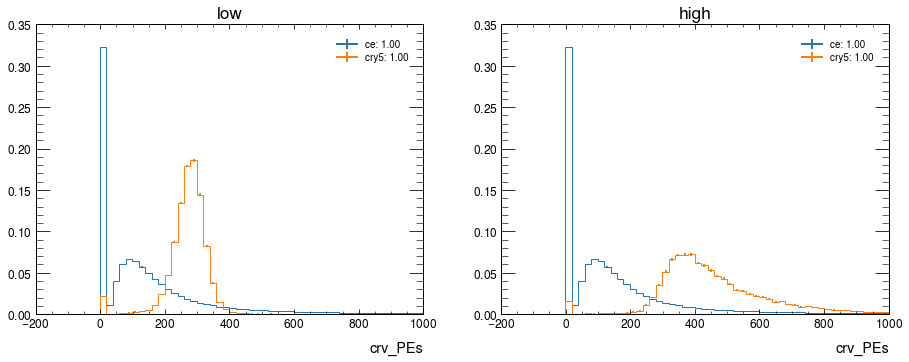

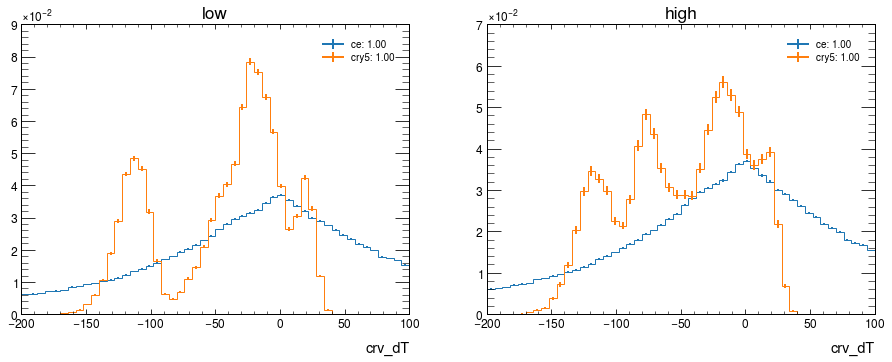

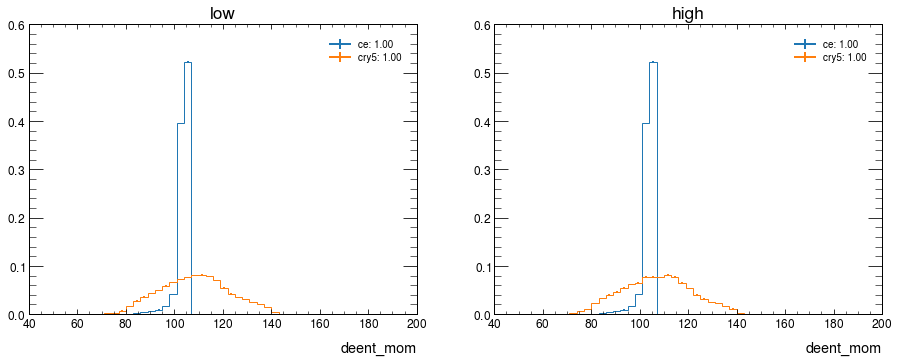

In [13]:
var_dict = utils.getVarList('allCRY5')

utils.LIVETIME_LO_CRY5 = 1.15E8*780/907
utils.LIVETIME_HI_CRY5 = 3.83E6*190/323

nLTimesCRY5 = [utils.LIVETIME_LO_CRY5/utils.LIVETIME_MU2E, utils.LIVETIME_HI_CRY5/utils.LIVETIME_MU2E]

title=["low", "high"]

for var in var_dict.keys():
  if "deent_z0" in var or "deent_om" in var: 
    continue

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
  h = hist.Hist(
    hist.axis.StrCategory(["ce", "cry5"], name="cat"),
    hist.axis.Regular(50, var_dict[var][0], var_dict[var][1], name="x", label="w [units]"),
    hist.storage.Weight(),
  ) 

  cut_tmp='(deent_mom > 100) & (deent_mom < 110)'
  for i in [0,1]:
    h.reset()
    h.fill(cat="ce", x=dfCE.query(cut_tbox + '& is_high==-1')[var].to_numpy())
    h.fill(cat="cry5", x=dfCRY5.query(cut_tbox + '& is_high==%d'%i)[var].to_numpy())

    h_tmp=(h["ce", :] / h["ce", :].counts().sum())
    h_tmp.plot(ax=axes[i], label='ce: %.2f'%h_tmp.counts().sum())
    h_tmp=(h["cry5", :] / h["cry5", :].counts().sum())
    h_tmp.plot(ax=axes[i], label='cry5: %.2f'%h_tmp.counts().sum())

    axes[i].set_xlabel(var)
    axes[i].set_title(title[i])
    axes[i].legend()


# Background estimation: production sources

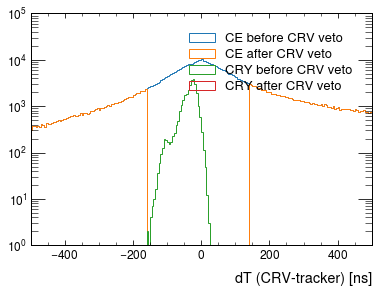

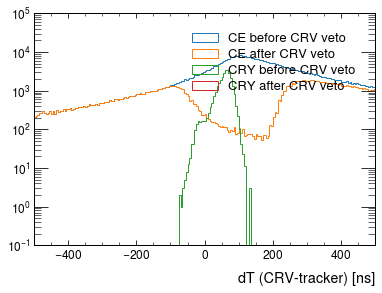

In [14]:
plt.hist(dfCE.query(cut_extmom+'& crv_timeWindowStart>0')['crv_dT'], bins=400, range=(-1000, 1000), histtype='step', label='CE before CRV veto');
plt.hist(dfCE.query(cut_current+'& crv_timeWindowStart>0')['crv_dT'], bins=400, range=(-1000, 1000), histtype='step', label='CE after CRV veto');
plt.hist(dfCRY5.query(cut_extmom+'& crv_timeWindowStart>0')['crv_dT'], histtype='step', bins=400, range=(-1000, 1000), label='CRY before CRV veto');
plt.hist(dfCRY5.query(cut_current+'& crv_timeWindowStart>0')['crv_dT'], histtype='step', bins=400, range=(-1000, 1000), label='CRY after CRV veto');

plt.xlabel('dT (CRV-tracker) [ns]')
plt.legend(fontsize=13)
plt.xlim(-500, 500)
plt.yscale('log')

plt.figure()
plt.hist(dfCE.query(cut_extmom+'& crv_timeWindowStart>0')['crv_dTe'], bins=400, range=(-1000, 1000), histtype='step', label='CE before CRV veto');
plt.hist(dfCE.query(cut_current+'& crv_timeWindowStart>0')['crv_dTe'], bins=400, range=(-1000, 1000), histtype='step', label='CE after CRV veto');
plt.hist(dfCRY5.query(cut_extmom+'& crv_timeWindowStart>0')['crv_dTe'], histtype='step', bins=400, range=(-1000, 1000), label='CRY before CRV veto');
plt.hist(dfCRY5.query(cut_current+'& crv_timeWindowStart>0')['crv_dTe'], histtype='step', bins=400, range=(-1000, 1000), label='CRY after CRV veto');

plt.xlabel('dT (CRV-tracker) [ns]')
plt.legend(fontsize=13)
plt.xlim(-500, 500)
plt.yscale('log')

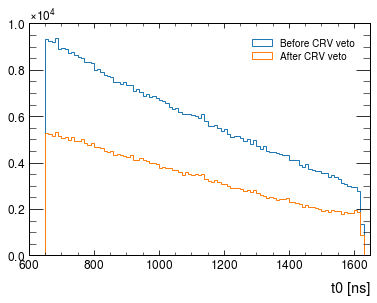

In [15]:
plt.hist(dfCE.query(cut_extmom+" & " + cut_t0+" & " + crv_live_window)['de_t0'], bins=110, range=(600, 1700), histtype='step', label='Before CRV veto');
plt.hist(dfCE.query(cut_current+" & " + cut_t0+" & " + crv_live_window)['de_t0'], bins=110, range=(600, 1700), histtype='step', label='After CRV veto');
plt.xlabel('t0 [ns]')
plt.xlim(600, 1650)
plt.legend();

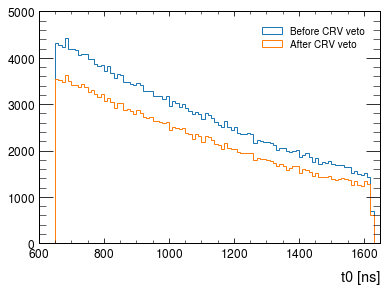

In [46]:
#cut_sector="crvsummarymc_crvSectorNumber != 8 & crvsummarymc_crvSectorNumber != 9 & crvsummarymc_crvSectorNumber != 12 & crvsummarymc_crvSectorNumber != 13 & crvsummarymc_crvSectorNumber != 14"  
cut_sector="crvsummarymc_crvSectorNumber != 0 & crvsummarymc_crvSectorNumber != 12 & crvsummarymc_crvSectorNumber != 6"
plt.hist(dfCE.query(cut_extmom+" & " + cut_t0+" & " + crv_live_window +" & " + cut_sector)['de_t0'], bins=110, range=(600, 1700), histtype='step', label='Before CRV veto');
plt.hist(dfCE.query(cut_current+" & " + cut_t0+" & " + crv_live_window +" & " + cut_sector)['de_t0'], bins=110, range=(600, 1700), histtype='step', label='After CRV veto');
plt.xlabel('t0 [ns]')
plt.xlim(600, 1650)
plt.legend();



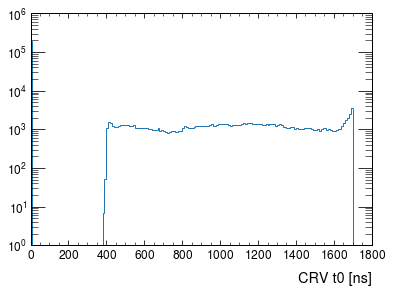

In [17]:
plt.hist(dfCE.query(cut_current+" & " + cut_t0)['crv_timeWindowStart'], bins=170, range=(0, 1700), histtype='step', label='After CRV cuts');
plt.xlabel('CRV t0 [ns]')
plt.yscale('log')

In [37]:
cut_current

'(de_status > 0) & (deent_td > 0.577350) & (deent_td < 1.000) & (deent_d0 > -80) & (deent_d0 < 105) & (deent_maxr > 450) & (deent_maxr < 680) & (dequal_TrkQual > 0.8) & (dequal_TrkPID > 0.95) & (ue_status <= 0) & (deent_mom > 90.000000) & (deent_mom < 140.000000) & ( crv_dT < -160 | crv_dT > 140)'

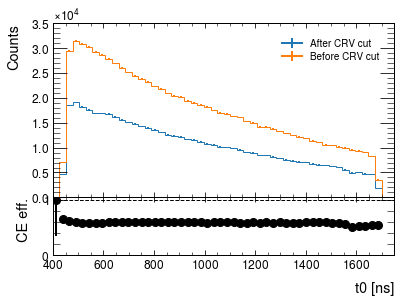

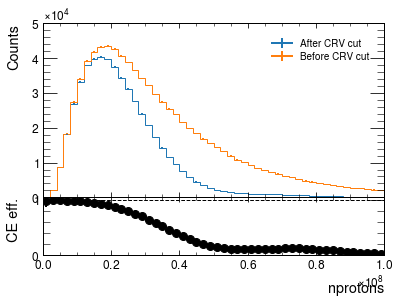

In [19]:
h = hist.Hist(
  hist.axis.StrCategory(["all", "cut", "all", "cut"], name="cat"),
  hist.axis.Regular(50, 400, 1700, name="x", label="t0 [ns]"),
  hist.storage.Weight(),
) 

h.fill(cat="all", x=dfCE.query(cut_extmom)['de_t0'].to_numpy())
h.fill(cat="cut", x=dfCE.query(cut_current)['de_t0'].to_numpy());

fig = plt.figure()
h["cut", :].plot_ratio(h["all", :], rp_num_label="After CRV cut", rp_denom_label="Before CRV cut", rp_ylim=[0.0, 1.05], rp_uncert_draw_type='line');
fig.get_axes()[1].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
fig.get_axes()[1].set_ylabel('CE eff.')
fig.get_axes()[1].set_xlim(400,1750)

h = hist.Hist(
  hist.axis.StrCategory(["all", "cut", "all", "cut"], name="cat"),
  hist.axis.Regular(50, 0, 1E8, name="x", label="nprotons"),
  hist.storage.Weight(),
) 

h.fill(cat="all", x=dfCE.query(cut_extmom)['evtinfomc_nprotons'].to_numpy())
h.fill(cat="cut", x=dfCE.query(cut_current)['evtinfomc_nprotons'].to_numpy());

fig = plt.figure()
h["cut", :].plot_ratio(h["all", :], rp_num_label="After CRV cut", rp_denom_label="Before CRV cut", rp_ylim=[0.0, 1.05], rp_uncert_draw_type='line');
fig.get_axes()[1].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
fig.get_axes()[1].set_ylabel('CE eff.');

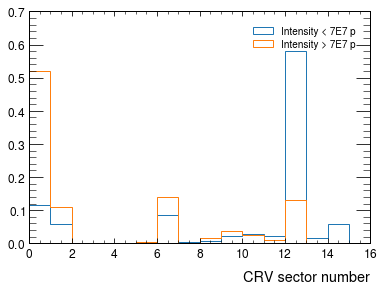

In [20]:
#plt.hist(dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons<7E7 & crv_PEs>0')['crv_crvSectorType'], bins=np.linspace(0, 10, 11), histtype='step', density=True, label='Intensity < 7E7 p') 
#plt.hist(dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons>7E7 & crv_PEs>0')['crv_crvSectorType'], bins=np.linspace(0, 10, 11), histtype='step', density=True, label='Intensity > 7E7 p')
plt.hist(dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons<7E7 & crv_PEs>0')['crvsummarymc_crvSectorNumber'], bins=np.linspace(0, 15, 16), histtype='step', density=True, label='Intensity < 7E7 p') 
plt.hist(dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons>7E7 & crv_PEs>0')['crvsummarymc_crvSectorNumber'], bins=np.linspace(0, 15, 16), histtype='step', density=True, label='Intensity > 7E7 p')

plt.xlabel('CRV sector number')
plt.legend();

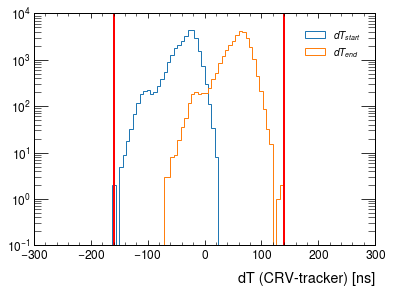

In [21]:
plt.hist(dfCRY5.query(cut_extmom+'& crv_PEs>0')['crv_dT'], bins=100, range=(-300,300), histtype='step', label='$dT_{start}$');
plt.hist(dfCRY5.query(cut_extmom+'& crv_PEs>0')['crv_dTe'], bins=100, range=(-300,300), histtype='step', label='$dT_{end}$');
plt.axvline(x=140, color='red')
plt.axvline(x=-160, color='red')
plt.legend(loc='upper right')
plt.yscale('log')
plt.xlabel('dT (CRV-tracker) [ns]');

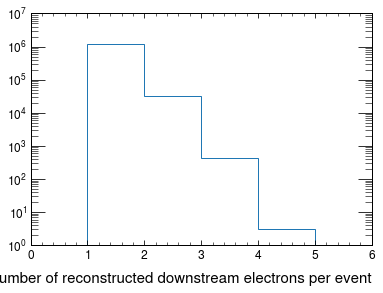

In [22]:
plt.hist(dfCE.groupby(['evtinfo_subrunid',	'evtinfo_eventid', 'evtinfomc_nprotons']).size().reset_index()[0], histtype='step', bins=6, range=(0,6));
plt.xlabel('Number of reconstructed downstream electrons per event', fontsize=15)
plt.yscale('log')

#PS sources at the end of micro-bunch

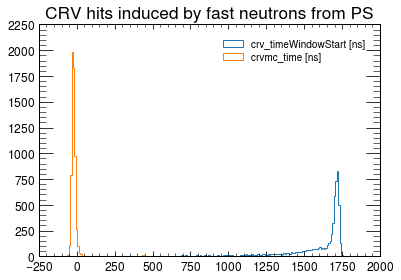

In [30]:
plt.hist(dfCE.query('crvmc_parentPdgId==2112 & crvmc_parentZ<-5000 &'+cut_t0)['crv_timeWindowStart'], histtype='step', bins=200, range=(-100, 1800), label='crv_timeWindowStart [ns]');
plt.hist(dfCE.query('crvmc_parentPdgId==2112 & crvmc_parentZ<-5000 &'+cut_t0)['crvmc_time'], histtype='step', bins=200, range=(-100, 1800), label='crvmc_time [ns]');
plt.title('CRV hits induced by fast neutrons from PS')
plt.legend();

Text(0.5, 1.0, 'CRY')

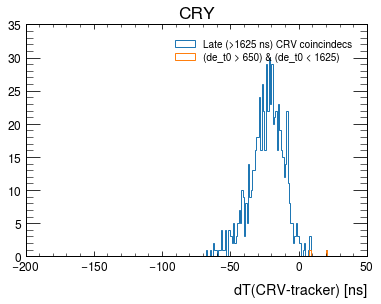

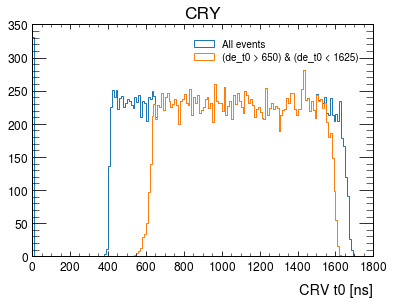

In [31]:
cut_tmp=cut_extmom_notiming+'& crvsummarymc_z>-9999'
plt.hist(dfCRY5.query(cut_tmp+'& crv_timeWindowStart>1625')['crv_dT'], histtype='step', bins=250, range=(-200, 50), label='Late (>1625 ns) CRV coincindecs');
plt.hist(dfCRY5.query(cut_tmp+'& crv_timeWindowStart>1625'+'&'+cut_t0)['crv_dT'], histtype='step', bins=250, range=(-200, 50), label=cut_t0);
plt.title('CRY')
plt.legend()
plt.xlabel('dT(CRV-tracker) [ns]')

plt.figure()
plt.hist(dfCRY5.query(cut_tmp)['crv_timeWindowStart'], histtype='step', bins=175, range=(0, 1750), label='All events');
plt.hist(dfCRY5.query(cut_tmp+'&'+cut_t0)['crv_timeWindowStart'], histtype='step', bins=175, range=(0, 1750), label=cut_t0);
plt.legend()
plt.xlabel('CRV t0 [ns]')
plt.title('CRY')

# Oversampling factor

In [32]:
df_tmp = dfCE.query('crv_PEs>0 & '+ cut_t0).groupby(['crvmc_x',	'crvmc_y', 'crvmc_z', 'crvmc_parentX', 'crvmc_parentZ', 'crvmc_parentPdgId', 'crvmc_gparentX', 'crvmc_gparentZ', 'crvmc_gparentPdgId', 'crvmc_pdgId', 'crvmc_time']).size().reset_index()
df_tmp.rename(columns={0:'sampling_factor'}, inplace=True)

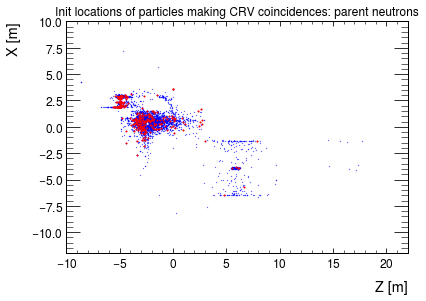

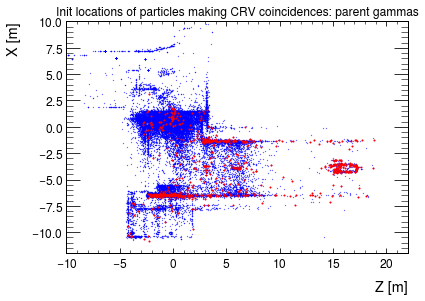

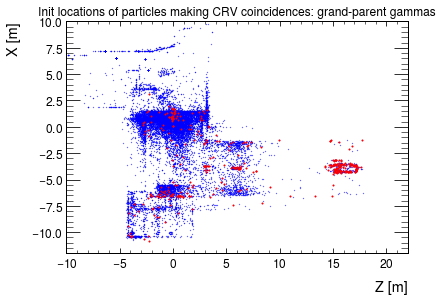

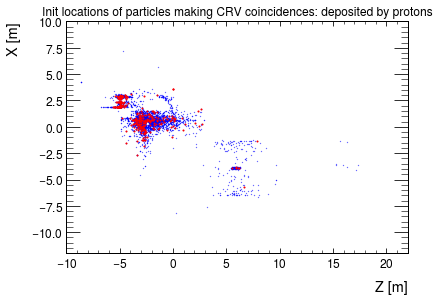

In [33]:
df_tmp2 = df_tmp.query('crvmc_parentPdgId==2112 & sampling_factor>1 & crvmc_time>-100')
plt.plot(df_tmp2['crvmc_parentZ']/1000, df_tmp2['crvmc_parentX']/1000, '.b', markersize=0.5);
df_tmp2 = df_tmp.query('crvmc_parentPdgId==2112 & sampling_factor>10 & crvmc_time>-100')
plt.plot(df_tmp2['crvmc_parentZ']/1000, df_tmp2['crvmc_parentX']/1000, '.r', markersize=2.0);
plt.ylim(-12, 10)
plt.xlim(-10, 22)
plt.title('Init locations of particles making CRV coincidences: parent neutrons', fontsize=12)
plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.figure()
df_tmp2 = df_tmp.query('crvmc_parentPdgId==22 & sampling_factor>1')
plt.plot(df_tmp2['crvmc_parentZ']/1000, df_tmp2['crvmc_parentX']/1000, '.b', markersize=0.5);
df_tmp2 = df_tmp.query('crvmc_parentPdgId==22 & sampling_factor>10')
plt.plot(df_tmp2['crvmc_parentZ']/1000, df_tmp2['crvmc_parentX']/1000, '.r', markersize=2.0);
plt.ylim(-12, 10)
plt.xlim(-10, 22)
plt.title('Init locations of particles making CRV coincidences: parent gammas', fontsize=12)
plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.figure()
df_tmp2 = df_tmp.query('crvmc_gparentPdgId==22 & sampling_factor>1')
plt.plot(df_tmp2['crvmc_gparentZ']/1000, df_tmp2['crvmc_gparentX']/1000, '.b', markersize=0.5);
df_tmp2 = df_tmp.query('crvmc_gparentPdgId==22 & sampling_factor>10')
plt.plot(df_tmp2['crvmc_gparentZ']/1000, df_tmp2['crvmc_gparentX']/1000, '.r', markersize=2.0);
plt.ylim(-12, 10)
plt.xlim(-10, 22)
plt.title('Init locations of particles making CRV coincidences: grand-parent gammas', fontsize=12)
plt.xlabel('Z [m]')
plt.ylabel('X [m]')

plt.figure()
df_tmp2 = df_tmp.query('crvmc_pdgId==2212 & sampling_factor>1')
plt.plot(df_tmp2['crvmc_gparentZ']/1000, df_tmp2['crvmc_gparentX']/1000, '.b', markersize=0.5);
df_tmp2 = df_tmp.query('crvmc_pdgId==2212 & sampling_factor>10')
plt.plot(df_tmp2['crvmc_gparentZ']/1000, df_tmp2['crvmc_gparentX']/1000, '.r', markersize=2.0);
plt.ylim(-12, 10)
plt.xlim(-10, 22)
plt.title('Init locations of particles making CRV coincidences: deposited by protons', fontsize=12)
plt.xlabel('Z [m]')
plt.ylabel('X [m]');

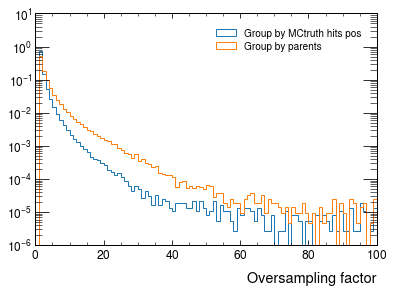

In [34]:
df_tmp = dfCE.query('crv_PEs>0 & '+ cut_t0).groupby(['crvmc_x',	'crvmc_y', 'crvmc_z']).size().reset_index()
df_tmp.rename(columns={0:'sampling_factor'}, inplace=True)
plt.hist(df_tmp['sampling_factor'], histtype='step', density=True, bins=100, range=(0, 100), label='Group by MCtruth hits pos');

df_tmp = dfCE.query('crv_PEs>0 & '+ cut_t0).groupby(['crvmc_parentX',	'crvmc_parentY', 'crvmc_parentZ']).size().reset_index()
df_tmp.rename(columns={0:'sampling_factor'}, inplace=True)
plt.hist(df_tmp['sampling_factor'], histtype='step', density=True, bins=100, range=(0, 100), label='Group by parents');

plt.xlabel('Oversampling factor');
plt.legend()
plt.yscale('log')

# Coincidence sources

<Figure size 432x288 with 0 Axes>

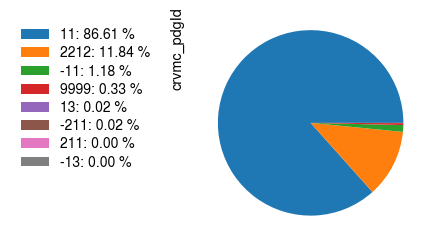

<Figure size 432x288 with 0 Axes>

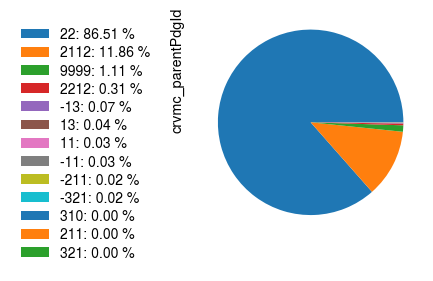

<Figure size 432x288 with 0 Axes>

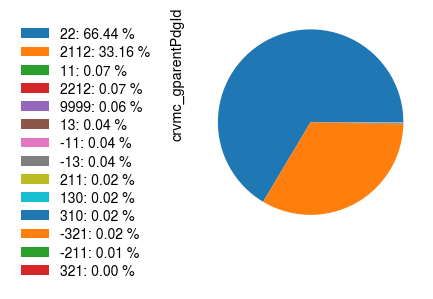

In [35]:
def plot_pie(var):
  plt.figure()
  df_tmp = dfCE.query('crv_PEs>0')[var].clip(upper=9999).to_frame()
  df_tmp = df_tmp.groupby([var]).size().to_frame().reset_index()
  df_tmp.rename(columns={0:'counts'}, inplace=True)
  df_tmp.sort_values('counts', inplace=True, ascending=False)

  df_tmp.plot(kind='pie', y='counts', labels=None)
  plt.ylabel(var)

  # Calculate percentages
  percent = 100.*df_tmp.counts/df_tmp.counts.sum()
  # Write labels
  labels = ['{0}: {1:1.2f} %'.format(i,j) for i,j in zip(df_tmp[var], percent)]
  plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=14);

plot_pie('crvmc_pdgId')
plot_pie('crvmc_parentPdgId')
plot_pie('crvmc_gparentPdgId')

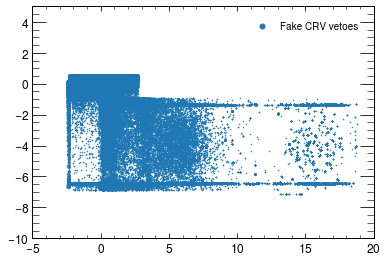

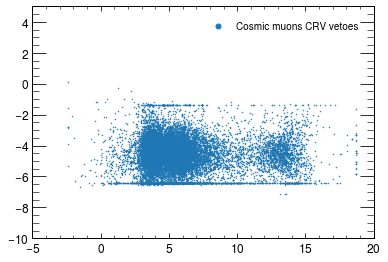

In [36]:
plt.plot(dfCE.query(cut_extmom)['crvsummarymc_z']/1000, dfCE.query(cut_extmom)['crvsummarymc_x']/1000, '.', label='Fake CRV vetoes', markersize=1.0)
plt.xlim(-5,20)
plt.ylim(-10,5)
plt.legend();
lgnd = plt.legend()
lgnd.legendHandles[0].set_markersize(10)

plt.figure()
plt.plot(dfCRY5.query(cut_extmom)['crvsummarymc_z']/1000, dfCRY5.query(cut_extmom)['crvsummarymc_x']/1000, '.', label='Cosmic muons CRV vetoes', markersize=1.)
plt.xlim(-5,20)
plt.ylim(-10,5)
plt.legend();
lgnd = plt.legend()
lgnd.legendHandles[0].set_markersize(10)

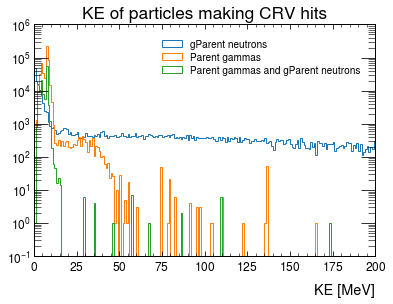

In [37]:
plt.hist(dfCE.query(cut_extmom+'& crvmc_gparentPdgId==2112')['crvmc_gparentE'], range=(0, 200), bins=200, histtype='step', label='gParent neutrons');
plt.hist(dfCE.query(cut_extmom+'& crvmc_parentPdgId==22')['crvmc_parentE'], range=(0, 200), bins=200, histtype='step', label='Parent gammas');
plt.hist(dfCE.query(cut_extmom+'& crvmc_parentPdgId==22 & crvmc_gparentPdgId==2112')['crvmc_parentE'], range=(0, 200), bins=200, histtype='step', label='Parent gammas and gParent neutrons');
plt.xlabel('KE [MeV]')
plt.title('KE of particles making CRV hits')
plt.legend()
plt.yscale('log')

Text(0.5, 1.0, 'Origins of cosmics')

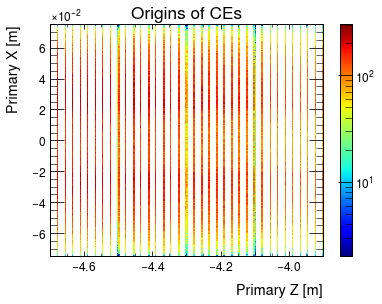

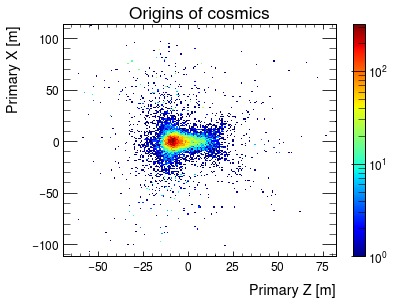

In [38]:
h=plt.hist2d(dfCE.query(cut_extmom)['demcpri_posZ']/1000, dfCE.query(cut_extmom)['demcpri_posX']/1000, bins = 200, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet);
plt.colorbar(h[3])
plt.xlabel('Primary Z [m]')
plt.ylabel('Primary X [m]');
plt.title('Origins of CEs')

plt.figure()
h=plt.hist2d(dfCRY5.query(cut_extmom)['demcpri_posZ']/1000, dfCRY5.query(cut_extmom)['demcpri_posX']/1000, bins = 200, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet);
plt.colorbar(h[3])
plt.xlabel('Primary Z [m]')
plt.ylabel('Primary X [m]');
plt.title('Origins of cosmics')

#Variables to discriminate noise from cosmics

/tmp/ipykernel_1437/3994627337.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


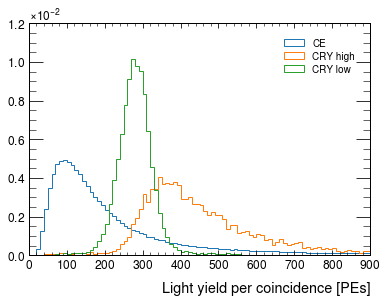

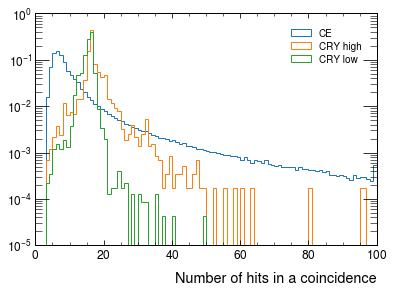

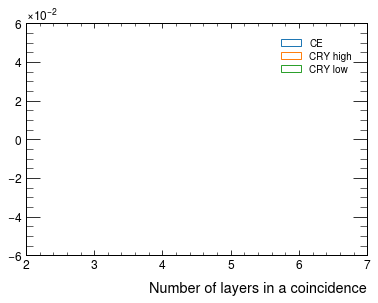

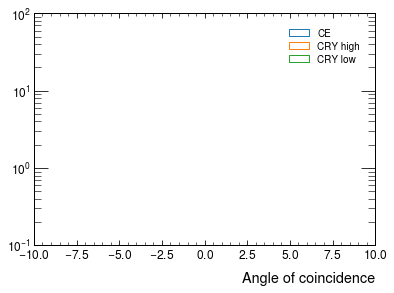

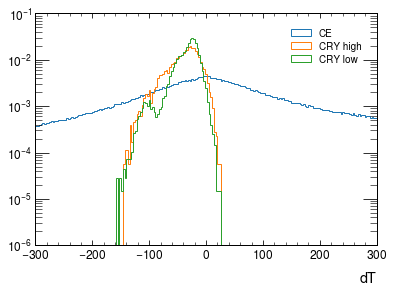

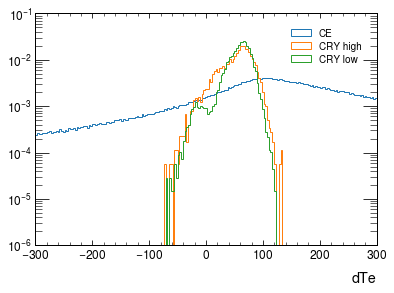

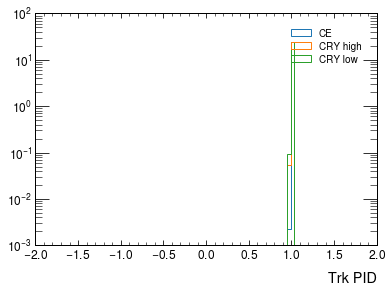

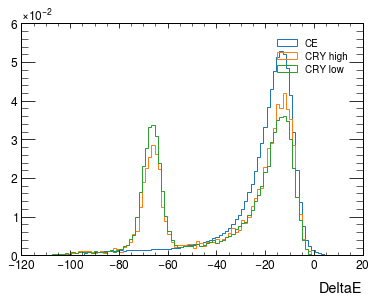

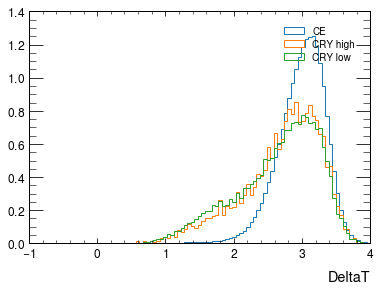

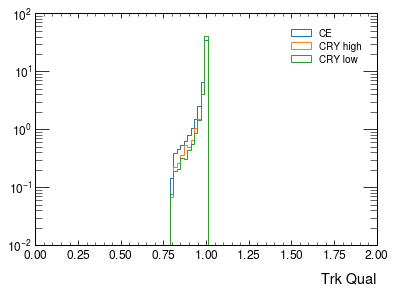

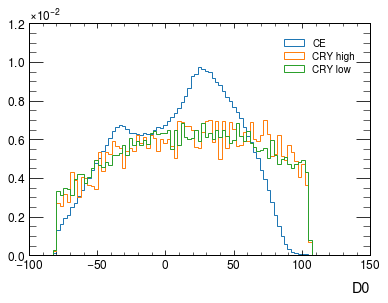

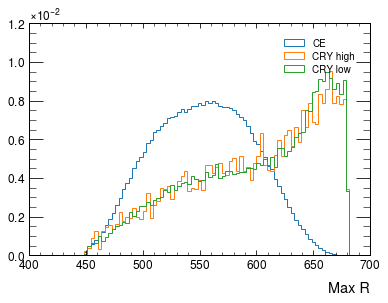

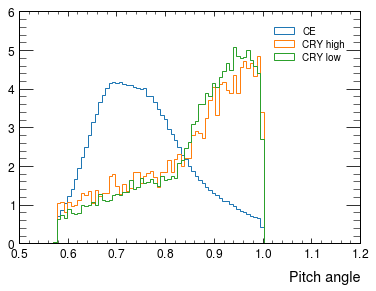

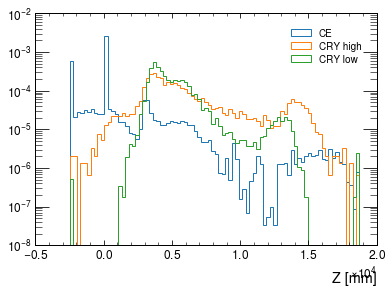

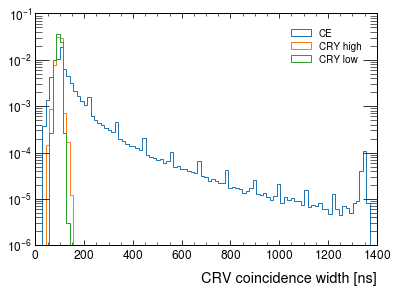

In [40]:
def compare_hist(var, bins, xlabel, logy=False):
  plt.figure()
  plt.hist(dfCE.query(cut_extmom+'& crv_PEs>0')[var], bins=bins, histtype='step', label='CE', density=True);
  plt.hist(dfCRY5.query(cut_extmom+'& is_high==1 & crv_PEs>0')[var], bins=bins, histtype='step', label='CRY high', density=True);
  plt.hist(dfCRY5.query(cut_extmom+'& is_high==0 & crv_PEs>0')[var], bins=bins, histtype='step', label='CRY low', density=True);
  if logy:
    plt.yscale('log')
  plt.xlabel(xlabel)
  plt.legend();

compare_hist('crv_PEs', np.linspace(0, 900, 91), 'Light yield per coincidence [PEs]')
compare_hist('crv_nCoincidenceHits', np.linspace(0, 100, 101), 'Number of hits in a coincidence', True)
compare_hist('crv_nCoincidenceLayers', np.linspace(2, 7, 6), 'Number of layers in a coincidence')
compare_hist('crv_angle', np.linspace(-10, 10, 210), 'Angle of coincidence', True)
compare_hist('crv_dT', np.linspace(-300, 300, 200), 'dT', True)
compare_hist('crv_dTe', np.linspace(-300, 300, 200), 'dTe', True)
compare_hist('dequal_TrkPID', np.linspace(-2, 2, 100), 'Trk PID', True)
compare_hist('detrkpid_DeltaE', np.linspace(-110, 20, 100), 'DeltaE')
compare_hist('detrkpid_DeltaT', np.linspace(-1, 4, 100), 'DeltaT')

compare_hist('dequal_TrkQual', np.linspace(0, 2, 100), 'Trk Qual', True)
compare_hist('deent_d0', np.linspace(-100, 150, 100), 'D0')
compare_hist('deent_maxr', np.linspace(400, 700, 100), 'Max R')
compare_hist('deent_td', np.linspace(0.5, 1.2, 100), 'Pitch angle')
compare_hist('crv_z', np.linspace(-5000, 20000, 100), 'Z [mm]', True)


dfCRY5['crv_windowSize'] = dfCRY5['crv_timeWindowEnd'] - dfCRY5['crv_timeWindowStart']
dfCE['crv_windowSize'] = dfCE['crv_timeWindowEnd'] - dfCE['crv_timeWindowStart']
compare_hist('crv_windowSize', np.linspace(0, 1400, 100), 'CRV coincidence width [ns]', True)


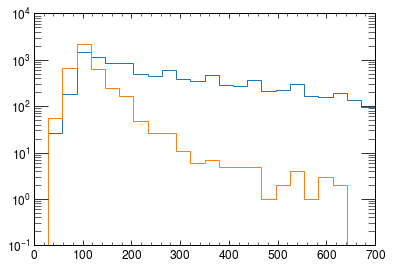

In [41]:
df_tmp = dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons>5E7 & crv_crvSectorType==4').groupby(['evtinfo_eventid','evtinfo_subrunid'])['crv_windowSize'].agg('sum')
plt.hist(df_tmp.reset_index()['crv_windowSize'], histtype='step', bins=np.linspace(0,700, 25));
df_tmp = dfCE.query(cut_extmom+'&'+crv_time+'& evtinfomc_nprotons>5E7 & crv_crvSectorType==5').groupby(['evtinfo_eventid','evtinfo_subrunid'])['crv_windowSize'].agg('sum')
plt.hist(df_tmp.reset_index()['crv_windowSize'], histtype='step', bins=np.linspace(0,700, 25));
plt.yscale('log')

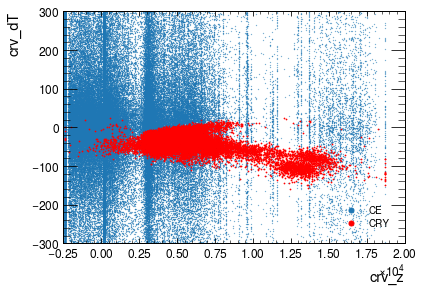

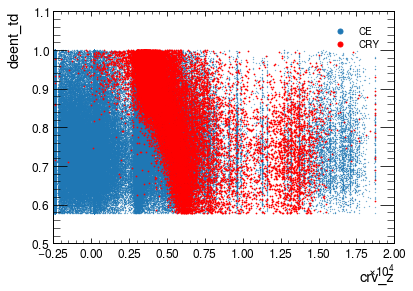

In [43]:
def compare_plot(var1, var2, rangeX=None, rangeY=None):
  plt.figure()
  plt.plot(dfCE.query(cut_extmom+'& crv_PEs>0')[var1], dfCE.query(cut_extmom+'& crv_PEs>0')[var2],  '.', label='CE', markersize=0.5);
  plt.plot(dfCRY5.query(cut_extmom+'& crv_PEs>0')[var1], dfCRY5.query(cut_extmom+'& crv_PEs>0')[var2],  '.r', label='CRY', markersize=1.5);
  if rangeY is not None:
    plt.ylim(rangeY)
  if rangeX is not None:
    plt.xlim(rangeX)
  plt.xlabel(var1)
  plt.ylabel(var2)
  lgnd = plt.legend()
  lgnd.legendHandles[0].set_markersize(10)
  lgnd.legendHandles[1].set_markersize(10)

compare_plot('crv_z', 'crv_dT', rangeY=(-300, 300))
compare_plot('crv_z', 'deent_td');


# Calo variables

/tmp/ipykernel_1437/3406442666.py:10: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left');


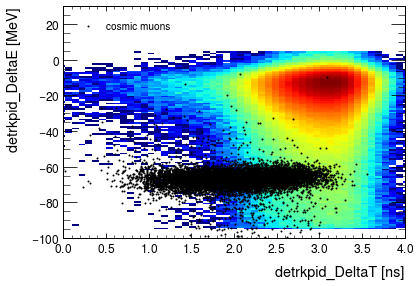

In [44]:
cut_tmp = cut_extmom+'& abs(demc_pdg) == 11'
plt.hist2d(dfCE.query(cut_tmp)['detrkpid_DeltaT'], dfCE.query(cut_tmp)['detrkpid_DeltaE'], bins = 100, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet, label='CE');
cut_tmp = cut_extmom+'& abs(demc_pdg) == 13'
plt.plot(dfCRY5.query(cut_tmp)['detrkpid_DeltaT'], dfCRY5.query(cut_tmp)['detrkpid_DeltaE'], '.k', markersize='2.0', label='cosmic muons');

plt.xlabel('detrkpid_DeltaT [ns]')
plt.ylabel('detrkpid_DeltaE [MeV]')
plt.xlim(0,4)
plt.ylim(-100,30);
plt.legend(loc='upper left');

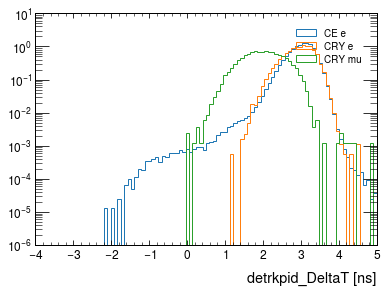

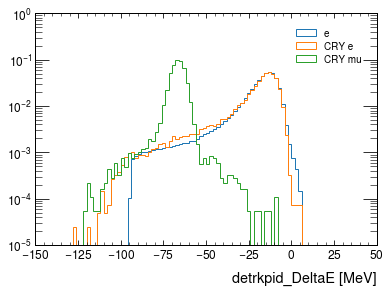

In [45]:
plt.figure()
plt.hist(dfCE.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaT'], bins = 100, range=(-4,5), histtype='step', label='CE e', density=True);
plt.hist(dfCRY5.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaT'], bins = 100, range=(-4,5), histtype='step', label='CRY e', density=True);
plt.hist(dfCRY5.query(cut_extmom+'& abs(demc_pdg) == 13')['detrkpid_DeltaT'], bins = 100, range=(-4,5), histtype='step', label='CRY mu', density=True);
plt.xlabel('detrkpid_DeltaT [ns]')
plt.yscale('log')
plt.legend()

plt.figure()
plt.hist(dfCE.query(cut_extmom+'& abs(demc_pdg) == 11 ')['detrkpid_DeltaE'], bins = 100, range=(-150,50), histtype='step', label='e', density=True);
plt.hist(dfCRY5.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaE'], bins = 100, range=(-150,50), histtype='step', label='CRY e', density=True);
plt.hist(dfCRY5.query(cut_extmom+'& abs(demc_pdg) == 13')['detrkpid_DeltaE'], bins = 100, range=(-150,50), histtype='step', label='CRY mu', density=True);
plt.xlabel('detrkpid_DeltaE [MeV]')
plt.yscale('log')
plt.legend();